In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

In [27]:
RANDOM_STATE = 42

In [121]:
data = pd.read_csv("../data/cirrhosis.csv")
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [123]:
data.Status.unique()

array(['D', 'C', 'CL'], dtype=object)

In [124]:
data.drop(columns="ID", inplace=True)

In [125]:
data["Sex"] = data["Sex"].map({"M": 1, "F": 0})
data["Status"] = data["Status"].map({"D": 1, "CL": 0, "C": 0})

In [126]:
data = pd.get_dummies(data, drop_first=True)

<Axes: >

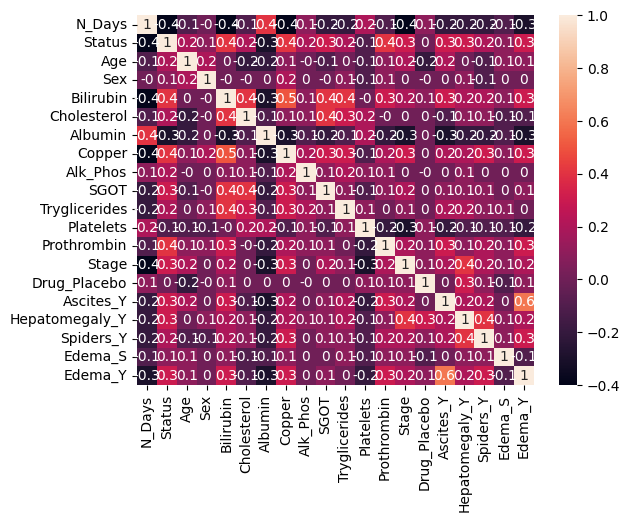

In [127]:
sns.heatmap(data.corr(numeric_only=True).round(1), annot=True)

In [128]:
data.dropna(inplace=True)
data.shape

(276, 20)

In [129]:
X, y = data.drop(columns="Status").values, data.Status.values

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=RANDOM_STATE)

In [131]:
lr_model = LogisticRegression(solver="liblinear", random_state=RANDOM_STATE)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [132]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        39
           1       0.95      0.70      0.81        30

    accuracy                           0.86        69
   macro avg       0.88      0.84      0.85        69
weighted avg       0.87      0.86      0.85        69



In [133]:
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [134]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        39
           1       0.91      0.67      0.77        30

    accuracy                           0.83        69
   macro avg       0.85      0.81      0.81        69
weighted avg       0.84      0.83      0.82        69



In [135]:
gb_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [136]:
y_pred = gb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        39
           1       0.86      0.80      0.83        30

    accuracy                           0.86        69
   macro avg       0.86      0.85      0.85        69
weighted avg       0.86      0.86      0.85        69

